<a href="https://colab.research.google.com/github/MichaelNovella/cs191tturnin/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic dataset problem

This is a program that will work with the Titanic dataset using logistic regression and multi layered perceptron. The first thing to do is call some libraries to work with the regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.decomposition import PCA
from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

This is to load in the dataset that we will load in and display what is inside of the dataset

In [2]:
titanic = pd.read_csv('drive/MyDrive/TitanicTrain.csv')
data = titanic.values
print(data.shape)
print (titanic.info())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Inside of this dataset there are some values that weren't assigned and this will show which ones are not assigned at the moment.

In [3]:
print("Missing Values: ")
print(titanic.isnull().sum())

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


From these we need to find the median of the value columns that are missing, here we will show the average of age on a histogram.

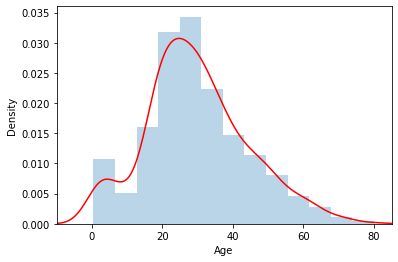

In [4]:
ax = titanic["Age"].hist(bins=13, density=True, alpha=0.3)
titanic["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Here we show the average of someone surviving the titanic on another histogram.

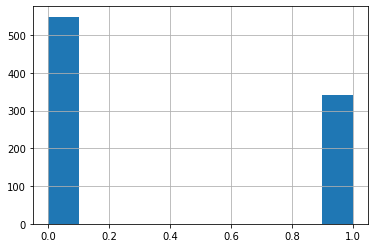

In [5]:
ax = titanic["Survived"].hist()

plt.show()

Here we provide a copy of the data we will be using and fill in any mising information in the age and embarked columns.

In [6]:
train_data = titanic.copy()
train_data["Age"].fillna(titanic["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(titanic['Embarked'].value_counts().idxmax(), inplace=True)

We can do the histogram again to show how this has effected the average age of the passanger.

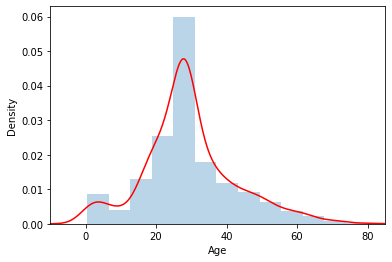

In [7]:
ax = train_data["Age"].hist(bins=13, density=True, alpha=0.3)
train_data["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

There we are going to convert the embarked and sex columns to numerical values where sex is either 0 or 1 and the embark column is turned into three different columns that will have a one or a zero depending on which of the three catagories embark can be.

In [8]:
train_data=train_data.fillna({'embarked' : 'S'})
training=pd.get_dummies(train_data, columns=["Embarked"])
#training.Sex.map({"male":0, "female":1})
training['Sex']=np.where(training['Sex'] == 'male',1,0)
print(training.info())
print(training.head())
print(training['Sex'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 79.3+ KB
None
   PassengerId  Survived  Pclass  ... Embarked_C  Embarked_Q  Embarked_S
0            1         0       3  ...          0           0           1

Here we look at what the tickets were and this will help determine which columns to drop.

In [9]:
print(training['Ticket'])

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object


This is where we drop the passenger Id, if they survived, the name, ticket, cabin, because they seemed unnessicary for the given information and would be easier to work with purely numerical columns.

In [10]:
training.drop(columns=['PassengerId','Survived', 'Name',  'Ticket',  'Cabin', 'PassengerId'], axis=1, inplace=True)
print(training.info())
print(training.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB
None
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  Embarked_S
0       3    1  22.0      1      0   7.2500           0           0           1
1       1    0  38.0      1      0  71.2833           1           0           0
2       3    0  26.0      0      0   7.9250           0           0           1
3       1    0  35.0      1      0  53.1000           0    

##Logistical
This is where I initalize the logistical function that will be worked on filtered dataset. It will use the lbfgs solver and will take 10000 iterations that will loop over the formula $y= \frac{1}{1+\mathrm{e}^{-h(x)}}$ where $h(x) = F(W,X)= \sum_{i=0}^n W_iX_i$. and this will be trained to fit the data and whether the person survived or not.

In [11]:
clf1 = LogisticRegression(solver='lbfgs',
                        max_iter=10000)
clf1.fit(training, titanic['Survived'] )

LogisticRegression(max_iter=10000)

Here we test the predictor on the dataset we have already loaded and get an accuracy score from it.

In [12]:
test_data = titanic.copy()
test_data["Age"].fillna(titanic["Age"].median(skipna=True), inplace=True)
test_data.fillna({'embarked' : 'S'})
test_data["Embarked"].fillna(titanic['Embarked'].value_counts().idxmax(), inplace=True)
testing=pd.get_dummies(test_data, columns=["Embarked"])
testing['Sex']=np.where(training['Sex'] == 'male',1,0)
testing.drop(columns=['PassengerId','Survived', 'Name',  'Ticket',  'Cabin', 'PassengerId'], axis=1, inplace=True)
prediction_rm=clf1.predict(testing)
print('The accuracy of the logistic regression is',round(accuracy_score(prediction_rm,titanic['Survived'])*100,2))

The accuracy of the logistic regression is 46.13


From this accuracy score we will now use the test dataset provided by kaggle. We will clean it up until it is the same as the testing data we used to fit it.

In [36]:
TitanicTest = pd.read_csv('drive/MyDrive/TitanicTest.csv')

print("Missing Values: ")
print(TitanicTest.isnull().sum())

test_data = TitanicTest.copy()
test_data["Age"].fillna(titanic["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(titanic["Fare"].median(skipna=True), inplace=True)
testing=pd.get_dummies(test_data, columns=["Embarked"])
testing['Sex']=np.where(TitanicTest['Sex'] == 'male',1,0)
testing.drop(columns=['PassengerId',  'Name',   'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
print(testing.info())
print(testing.head())


print("Missing Values: ")
print(testing.isnull().sum())

Missing Values: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB
None
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  Embarked_S
0       3    1  34.5      0      0   7.8292           0     

After cleaning it up we use our predict function to predict if the person is alive or if the person is dead. After that, we will put into a new csv file and test it on kaggle.

In [37]:
predict = clf1.predict(testing)

TitanicTest['Survived']=predict

TitanicTest[['PassengerId','Survived']].to_csv('drive/MyDrive/Titaniclogisticonly.csv', index=False, header=True)



This gave a score of 0.76794 from kaggle. There could have been better improvements in the way of filtering data and to better use more of the dataset.

##Multilayered perceptron MLP Classifier 
This is the mlp classifier that will be used for back propagation on the data. First we initialize the classifier with the solver being sgd and having 40 nodes in the hidden layer. Then we use the activation in the middle to be the same as before but with different weights converging to one solution. Since it is a classifier it will already give the y value as a 0 or 1.

In [30]:
classifier = MLPClassifier(solver="sgd")
classifier.hidden_layer_sizes = (40,) 
classifier.activation = "logistic"
classifier.fit(training, titanic['Survived'] )

MLPClassifier(activation='logistic', hidden_layer_sizes=(40,), solver='sgd')

Here we will do the same thing where we test with our own data to see accuracy.

In [34]:
test_data = titanic.copy()
test_data["Age"].fillna(titanic["Age"].median(skipna=True), inplace=True)
test_data.fillna({'embarked' : 'S'})
test_data["Embarked"].fillna(titanic['Embarked'].value_counts().idxmax(), inplace=True)
testing=pd.get_dummies(test_data, columns=["Embarked"])
testing['Sex']=np.where(training['Sex'] == 'male',1,0)
testing.drop(columns=['PassengerId','Survived', 'Name',  'Ticket',  'Cabin', 'PassengerId'], axis=1, inplace=True)
prediction_rm=clf1.predict(testing)
print('The accuracy of the logistic regression is',round(accuracy_score(prediction_rm,titanic['Survived'])*100,2))

The accuracy of the logistic regression is 46.13


Here we clean it up to prepare it for predicting like the last one.

In [39]:
TitanicTest = pd.read_csv('drive/MyDrive/TitanicTest.csv')

print("Missing Values: ")
print(TitanicTest.isnull().sum())

test_data = TitanicTest.copy()
test_data["Age"].fillna(titanic["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(titanic["Fare"].median(skipna=True), inplace=True)
testing=pd.get_dummies(test_data, columns=["Embarked"])
testing['Sex']=np.where(TitanicTest['Sex'] == 'male',1,0)
testing.drop(columns=['PassengerId',  'Name',   'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
print(testing.info())
print(testing.head())


print("Missing Values: ")
print(testing.isnull().sum())

Missing Values: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB
None
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  Embarked_S
0       3    1  34.5      0      0   7.8292           0     

Here we predict, put our results into a csv file, and send it to kaggle for scoring.

In [40]:
predict = classifier.predict(testing)

TitanicTest['Survived']=predict

TitanicTest[['PassengerId','Survived']].to_csv('drive/MyDrive/Titaniclogisticandmlp.csv', index=False, header=True)


This gave a worse score of 0.66028 from kaggle. This is interesting to come from something that should be a better form of recognition. This might also be the same problem as with the logistical version with more looking at other columns.